In [1]:
source('../../functions.R')

seurat = readRDS('Data/periphery_CDR3.RDS')
setwd('Figures/Figure 7')
library(ggbeeswarm)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object

In [2]:
 seurat = readRDS('../../Data/periphery_CDR3.RDS')

In [3]:
seurat@meta.data$TRB_count = NA
for (each in unique(seurat@meta.data$Patient)) {
    ind = which(seurat@meta.data$Patient == each) 
    sub = seurat@meta.data[ind, 'TRB_CDR3']
    tab = table(sub)
    seurat@meta.data[ind, 'TRB_count'] = tab[sub]   
}
seurat@meta.data$TRB_count[is.na(seurat@meta.data$TRB_count)] = NA
table(seurat@meta.data$TRB_count)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5891  832  339  248  180  108   63   96   63   70   44   36   52   56   75   32 
  19   27   45 
  19   27   45 

Warning message:
"Removed 22359 rows containing missing values (geom_point)."

Warning message:
"Removed 22359 rows containing missing values (geom_point)."

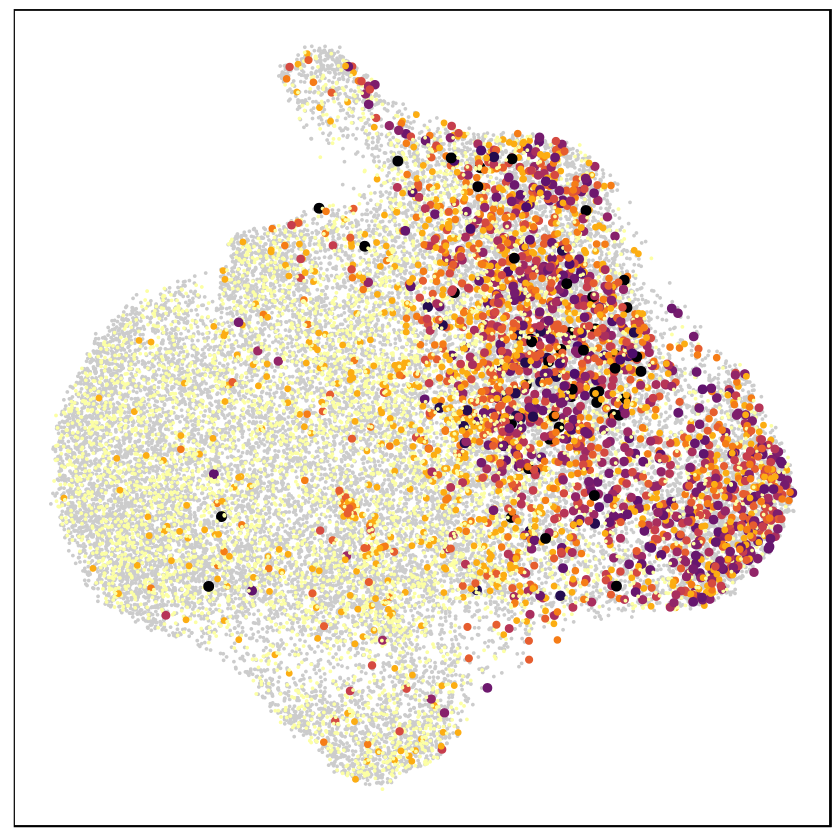

In [4]:
seurat@meta.data$trb_size_factor = seurat@meta.data$TRB_count
seurat@meta.data$trb_size_factor[seurat@meta.data$TRB_count > 10] = '>10'
seurat@meta.data$trb_size_factor = factor(seurat@meta.data$trb_size_factor, levels = c(1, 2, 3, 4, 5, 6,7 ,8, 9, 10, '>10'))


ggplot(shuffle(seurat@meta.data) %>% filter(is.na(TRB_CDR3)), aes(x = UMAP1, y = UMAP2))  +geom_point(color = 'grey80', size = .001) +
geom_point(data = shuffle(seurat@meta.data), aes(x = UMAP1, y = UMAP2, size = log2(TRB_count), color = log2(TRB_count))) + UMAP_theme + scale_color_viridis(na.value = 'grey95', option = 'inferno', 
direction = -1) +
scale_size_continuous(range = c(.01, 2))

ggsave('trb.pdf', height =2, width = 2, useDingbats = FALSE)




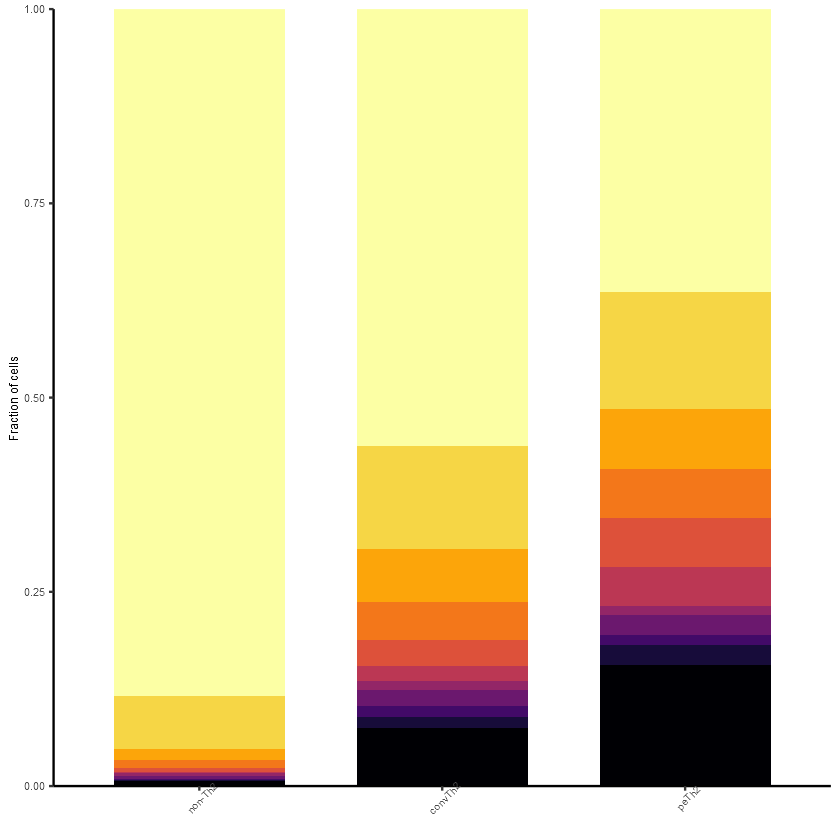

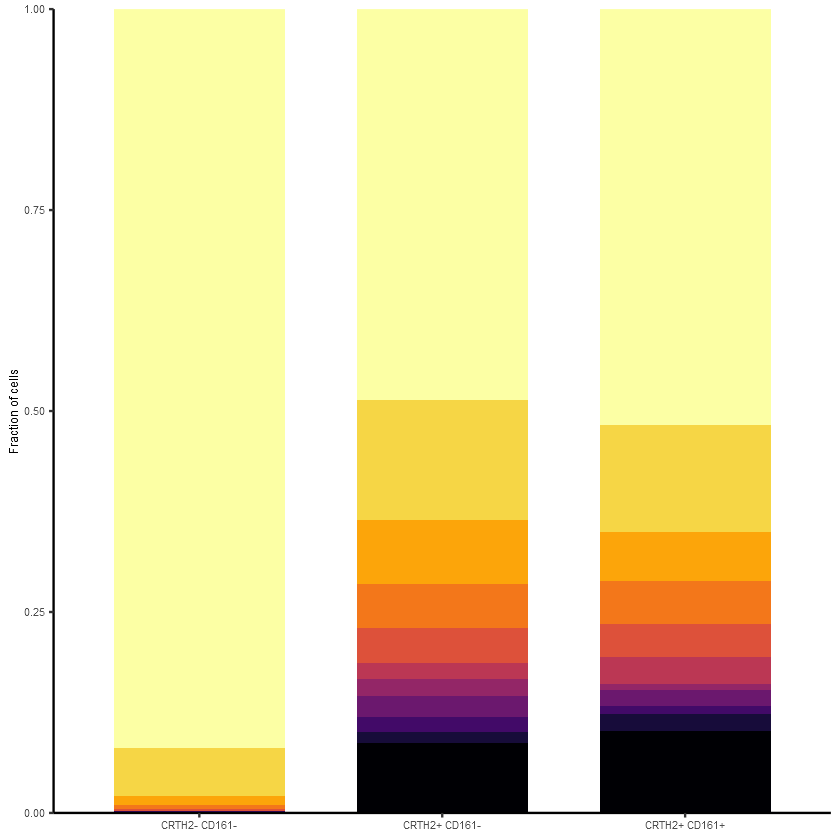

In [5]:
seurat@meta.data$trb_size_factor = seurat@meta.data$TRB_count
seurat@meta.data$trb_size_factor[seurat@meta.data$TRB_count > 10] = '>10'
seurat@meta.data$trb_size_factor = factor(seurat@meta.data$trb_size_factor, levels = c(1, 2, 3, 4, 5, 6,7 ,8, 9, 10, '>10'))

seurat@meta.data$pheno = 'non-Th2'
seurat@meta.data$pheno[seurat@meta.data$res.0.15 == 1] = 'convTh2'
seurat@meta.data$pheno[seurat@meta.data$res.0.15 == 2] = 'peTh2'
seurat@meta.data$pheno = factor(seurat@meta.data$pheno, levels = c('non-Th2', 'convTh2', 'peTh2'))

ggplot(seurat@meta.data %>% filter(!is.na(TRB_CDR3)), aes(x = pheno, fill = trb_size_factor)) + 
geom_bar(position = 'fill', width = .7) + scale_fill_viridis_d(direction = -1, option = 'inferno') +
theme_classic() + Axis_themes + labs(y = 'Fraction of cells') + theme(axis.text.x = element_text(angle = 45), 
                                                                     legend.key.size = unit(.1, "cm"), 
                                                                     legend.text = element_text(size = 6))  + 
labs(fill = c(), x = c()) + guides(fill = FALSE) + scale_y_continuous(expand = c(0,0))
ggsave('stacked.pdf', width = 1.3, height = 2.1, useDingbats = FALSE)


ggplot(seurat@meta.data %>% filter(!is.na(TRB_CDR3)), aes(x = Fraction, fill = trb_size_factor)) + 
geom_bar(position = 'fill', width = .7) + scale_fill_viridis_d(direction = -1, option = 'inferno') +
theme_classic() + Axis_themes + labs(y = 'Fraction of cells') + theme(axis.text.x = element_text(angle = 0), 
                                                                     legend.key.size = unit(.1, "cm"), 
                                                                     legend.text = element_text(size = 6))  + 
labs(fill = c(), x = c()) + guides(fill = FALSE) + scale_y_continuous(expand = c(0,0))
ggsave('stacked_fraction.pdf', width = 1.3, height = 2.1, useDingbats = FALSE)

Warning message:
"package 'vegan' was built under R version 3.5.3"Loading required package: permute
Warning message:
"package 'permute' was built under R version 3.5.3"
Attaching package: 'permute'

The following object is masked _by_ '.GlobalEnv':

    shuffle

Loading required package: lattice
This is vegan 2.5-6


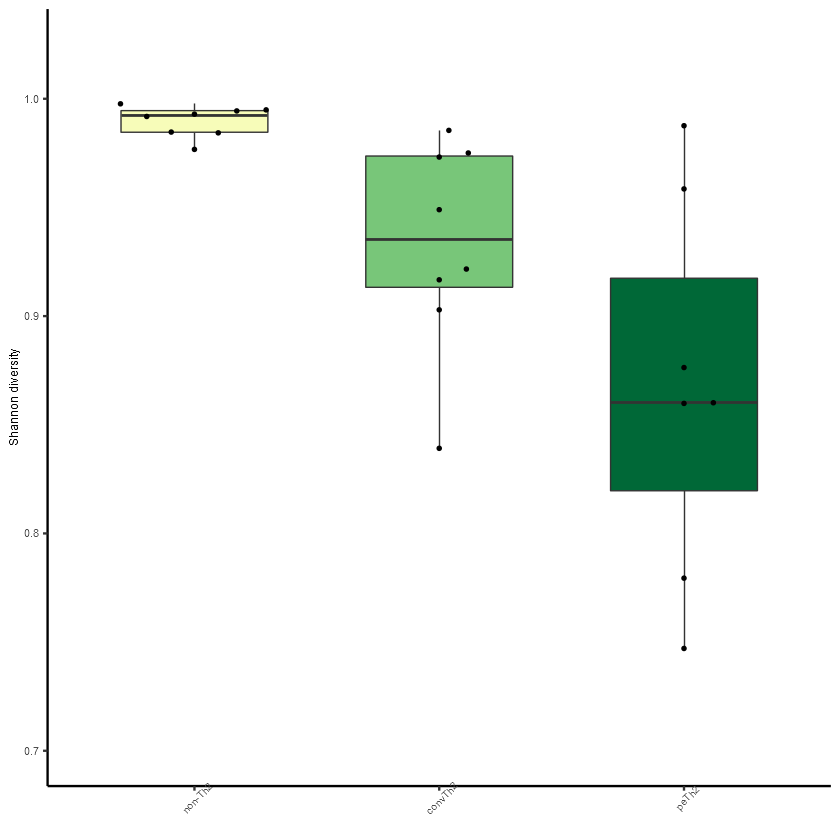

In [6]:
library(dplyr)
library(vegan)
df = seurat@meta.data %>% filter(!is.na(TRBV)) %>% group_by(Patient, pheno) %>% summarize(div = diversity(table(TRB_CDR3)), n = n()) %>% filter(n >10) %>% mutate(div = div/log(n))

palette = brewer.pal(9, 'YlGn')[c(2, 5, 8)]
                            
    ggplot(df, aes(x = pheno, y = div, fill =pheno)) + geom_boxplot(size = .3, width = .6, outlier.size = .3) + geom_beeswarm(size = .5, cex = 4)  + theme_classic() + Axis_themes + labs(x = c(), y = 'Shannon diversity') +
scale_fill_manual(values = palette) + guides(fill = FALSE) + theme(axis.text.x = element_text(size = 6, angle = 45), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6)) +
scale_y_continuous(limits = c(.70, 1.025))
write.csv(df,'7d.csv')
ggsave('diversity_pheno.pdf', width = 1.5, height = 2.1, useDingbats = FALSE) 

In [7]:
wilcox.test(df$div[df$pheno == 'non-Th2'], df$div[df$pheno == 'convTh2'])
wilcox.test(df$div[df$pheno == 'non-Th2'], df$div[df$pheno == 'peTh2'])
wilcox.test(df$div[df$pheno == 'convTh2'], df$div[df$pheno == 'peTh2'])


	Wilcoxon rank sum test

data:  df$div[df$pheno == "non-Th2"] and df$div[df$pheno == "convTh2"]
W = 61, p-value = 0.001088
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  df$div[df$pheno == "non-Th2"] and df$div[df$pheno == "peTh2"]
W = 53, p-value = 0.002176
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  df$div[df$pheno == "convTh2"] and df$div[df$pheno == "peTh2"]
W = 40, p-value = 0.1893
alternative hypothesis: true location shift is not equal to 0


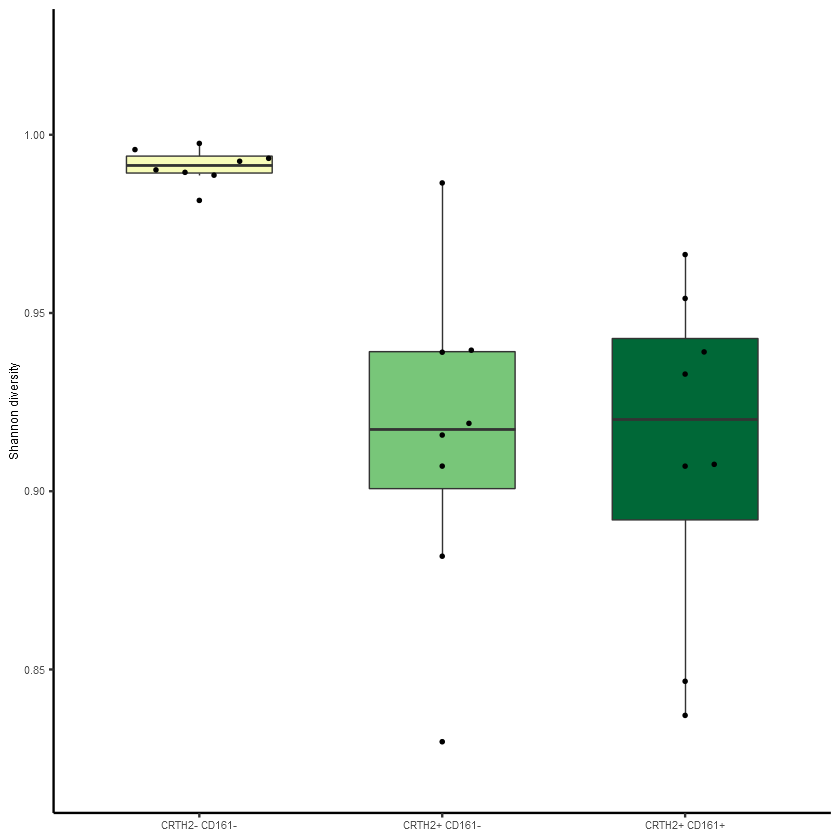

In [8]:
library(dplyr)
library(vegan)
df = seurat@meta.data %>% filter(!is.na(TRBV)) %>% group_by(Patient, Fraction) %>% summarize(div = diversity(table(TRB_CDR3)), n = n()) %>% filter(n >10) %>% mutate(div = div/log(n))

palette = brewer.pal(9, 'YlGn')[c(2, 5, 8)]
                            
    ggplot(df, aes(x =Fraction, y = div, fill =Fraction)) + geom_boxplot(size = .3, width = .6, outlier.size = .3) + geom_beeswarm(size = .5, cex = 4)  + theme_classic() + Axis_themes + labs(x = c(), y = 'Shannon diversity') +
scale_fill_manual(values = palette) + guides(fill = FALSE) + theme(axis.text.x = element_text(size = 6, angle = ), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6)) +
scale_y_continuous(limits = c(.82, 1.025))
write.csv(df, '11a.csv')
ggsave('diversity_fraction.pdf', width = 1.3, height = 2.1, useDingbats = FALSE) 

In [9]:
wilcox.test(df$div[df$Fraction== 'CRTH2+ CD161+'], df$div[df$Fraction== 'CRTH2- CD161-'])
wilcox.test(df$div[df$Fraction== 'CRTH2+ CD161-'], df$div[df$Fraction== 'CRTH2- CD161-'])
wilcox.test(df$div[df$Fraction== 'CRTH2+ CD161+'], df$div[df$Fraction== 'CRTH2+ CD161-'])


	Wilcoxon rank sum test

data:  df$div[df$Fraction == "CRTH2+ CD161+"] and df$div[df$Fraction == "CRTH2- CD161-"]
W = 0, p-value = 0.0001554
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  df$div[df$Fraction == "CRTH2+ CD161-"] and df$div[df$Fraction == "CRTH2- CD161-"]
W = 1, p-value = 0.0003108
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  df$div[df$Fraction == "CRTH2+ CD161+"] and df$div[df$Fraction == "CRTH2+ CD161-"]
W = 32, p-value = 1
alternative hypothesis: true location shift is not equal to 0


In [10]:
# calculate hamming distance and record distance to nearest sequence
library(stringdist)
data = seurat@meta.data %>% filter(!is.na(TRB_CDR3))
i = 1
for (curr in unique(data$Patient)) {
    sub = data %>% filter(Patient == curr)
    vec = unique(sub$TRB_CDR3)
    distmat = stringdistmatrix(vec, method = 'ham')
    distmat = as.matrix(distmat)
    distmat[is.na(distmat)] = Inf
    mindist = apply(distmat, 2, function(x) min(x[x > 0], na.rm = TRUE))
    distmat[distmat == 0] = NA
    ind = apply(distmat, 2, function(x) which.min(x)) 
    
    names(mindist) = as.character(vec)
    names(ind) = as.character(vec)
    sub$mindist = mindist[sub$TRB_CDR3]
    sub$nn = vec[ind[sub$TRB_CDR3]]
    if (i == 1) {
        df = sub
    }
    else {
        df = rbind(df, sub)
    }
    i = i + 1
}

Warning message:
"package 'stringdist' was built under R version 3.5.3"

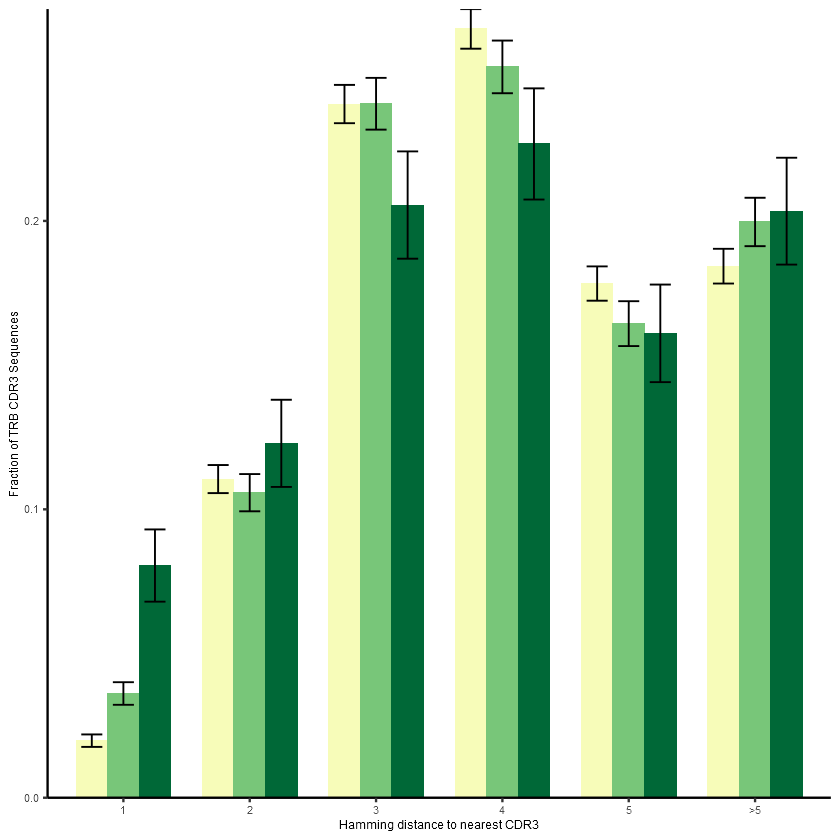

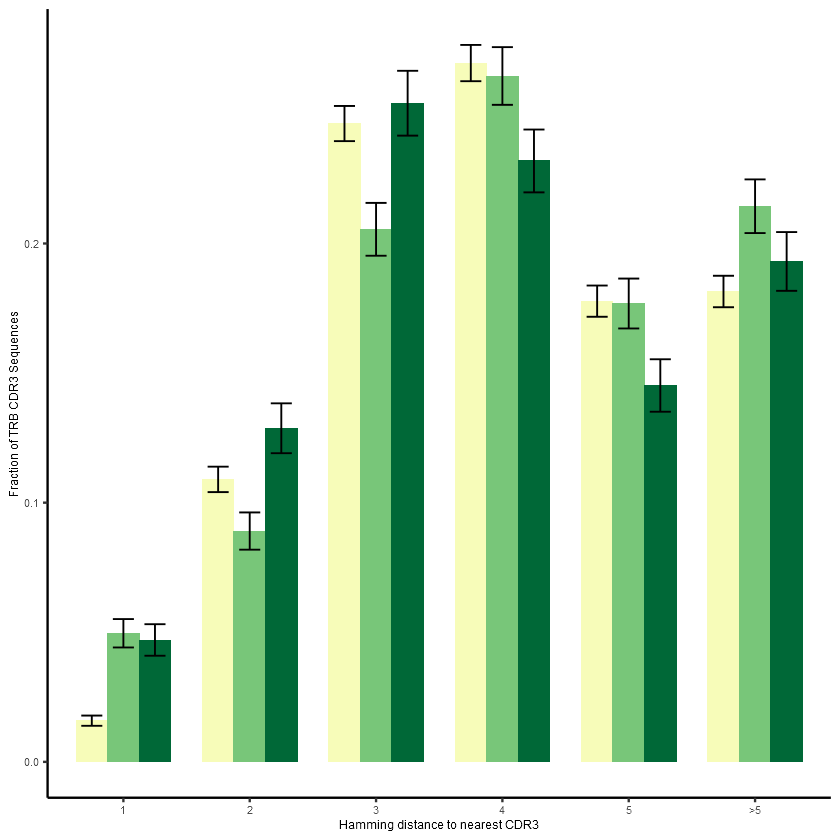

In [11]:
df$actual = df$mindist
df$actual[df$mindist > 5] = '>5'
a = df %>% group_by(Patient, pheno, TRB_CDR3) %>% summarize(actual = actual[1]) %>% group_by(pheno, actual) %>% summarize(n = n()) %>% mutate(p = n/sum(n), ntotal = sum(n), sd = sqrt(p * (1-p)/ntotal))

ggplot(a, aes(x = factor(actual, levels = c(1,2,3,4,5,'>5')), y = p, group = pheno, fill = factor(pheno))) + geom_col(position = 'dodge', width = .75) + Axis_themes + 
theme_classic() + scale_fill_manual(values = palette) + guides(fill = FALSE) + 
geom_errorbar(aes(ymin = p-sd, ymax = p+sd), width = .5, position = position_dodge(width = .75), size = .4) + scale_y_continuous(expand = c(0,0)) + 
labs(x = 'Hamming distance to nearest CDR3', y= 'Fraction of TRB CDR3 Sequences')  + theme(axis.text.x = element_text(size = 6), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6))
ggsave('hamming.pdf', height = 2, width = 2.3)
write.csv(a, '7e.csv')

a = df %>% group_by(Patient, Fraction, TRB_CDR3) %>% summarize(actual = actual[1]) %>% group_by(Fraction, actual) %>% summarize(n = n()) %>% mutate(p = n/sum(n), ntotal = sum(n), sd = sqrt(p * (1-p)/ntotal))


ggplot(a, aes(x = factor(actual, levels = c(1,2,3,4,5,'>5')), y = p, group = Fraction, fill = factor(Fraction))) + geom_col(position = 'dodge', width = .75) + Axis_themes + 
theme_classic() + scale_fill_manual(values = palette) + guides(fill = FALSE) + 
geom_errorbar(aes(ymin = p-sd, ymax = p+sd), width = .5, position = position_dodge(width = .75), size = .4) +
labs(x = 'Hamming distance to nearest CDR3', y= 'Fraction of TRB CDR3 Sequences')  + theme(axis.text.x = element_text(size = 6), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6))

ggsave('hamming_fraction.pdf', height = 2.1, width = 1.8)
write.csv(a, 's11b.csv')

In [12]:
a = df %>% group_by(Patient, pheno, TRB_CDR3) %>% summarize(actual = actual[1]) %>% group_by(pheno, actual) %>% summarize(n = n()) %>% mutate(p = n/sum(n), ntotal = sum(n), sd = sqrt(p * (1-p)/ntotal))

a %>% filter(actual ==  1)

pheno,actual,n,p,ntotal,sd
non-Th2,1,82,0.01978287,4145,0.002162935
convTh2,1,82,0.03613927,2269,0.003918137
peTh2,1,38,0.08050847,472,0.012523441


In [13]:
# Hamming distance 1 tests: phenotype
prop.test(c(38, 82), c(472, 4145))
prop.test(c(82, 82), c(2269, 4145))
prop.test(c(38, 82), c(472, 2269))

prop.test(c(58, 458), c(472, 4145))

0.080508476/0.03613927
0.080508476/0.01978287

#hamming distance tests: sort fraction
prop.test(c(57, 64), c(1212, 4028))
prop.test(c(78, 64), c(1572, 4028))
prop.test(c(57, 78), c(1212, 1572))



	2-sample test for equality of proportions with continuity correction

data:  c(38, 82) out of c(472, 4145)
X-squared = 59.35, df = 1, p-value = 1.32e-14
alternative hypothesis: two.sided
95 percent confidence interval:
 0.03463677 0.08681444
sample estimates:
    prop 1     prop 2 
0.08050847 0.01978287 



	2-sample test for equality of proportions with continuity correction

data:  c(82, 82) out of c(2269, 4145)
X-squared = 15.095, df = 1, p-value = 0.0001022
alternative hypothesis: two.sided
95 percent confidence interval:
 0.007243594 0.025469201
sample estimates:
    prop 1     prop 2 
0.03613927 0.01978287 



	2-sample test for equality of proportions with continuity correction

data:  c(38, 82) out of c(472, 2269)
X-squared = 17.329, df = 1, p-value = 3.143e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01737076 0.07136765
sample estimates:
    prop 1     prop 2 
0.08050847 0.03613927 



	2-sample test for equality of proportions with continuity correction

data:  c(58, 458) out of c(472, 4145)
X-squared = 0.53611, df = 1, p-value = 0.464
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01991049  0.04468406
sample estimates:
   prop 1    prop 2 
0.1228814 0.1104946 


[1] 2.227728

[1] 4.069605


	2-sample test for equality of proportions with continuity correction

data:  c(57, 64) out of c(1212, 4028)
X-squared = 38.683, df = 1, p-value = 4.986e-10
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01807575 0.04420610
sample estimates:
    prop 1     prop 2 
0.04702970 0.01588878 



	2-sample test for equality of proportions with continuity correction

data:  c(78, 64) out of c(1572, 4028)
X-squared = 50.695, df = 1, p-value = 1.079e-12
alternative hypothesis: two.sided
95 percent confidence interval:
 0.02187915 0.04557994
sample estimates:
    prop 1     prop 2 
0.04961832 0.01588878 



	2-sample test for equality of proportions with continuity correction

data:  c(57, 78) out of c(1212, 1572)
X-squared = 0.051204, df = 1, p-value = 0.821
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01935937  0.01418213
sample estimates:
    prop 1     prop 2 
0.04702970 0.04961832 


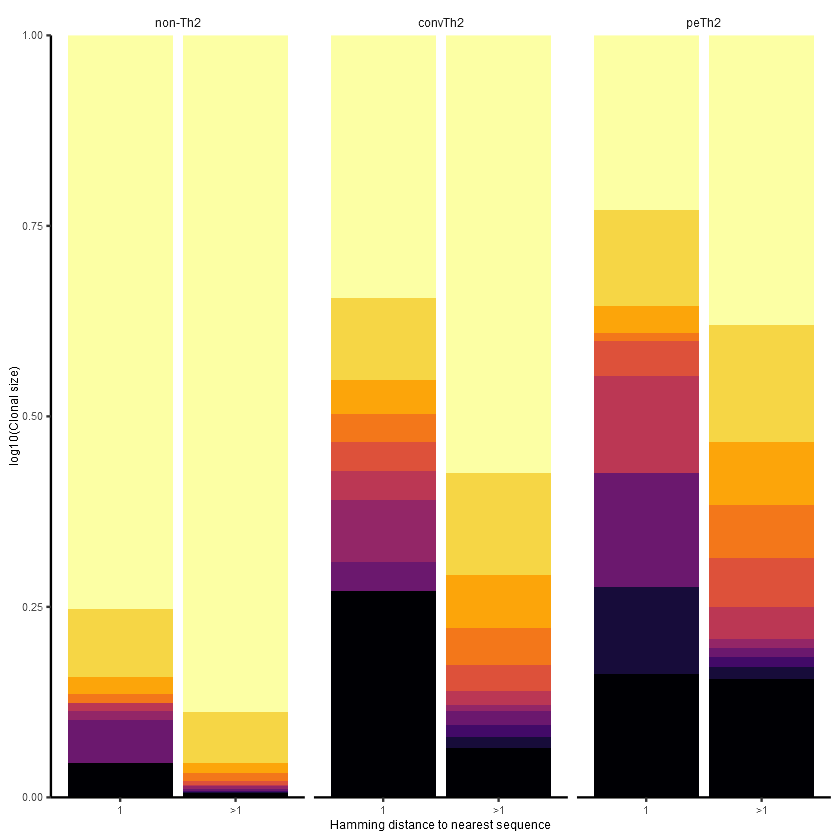

In [14]:
df$bin = as.numeric(df$mindist == 1)

ggplot(df, aes(x = factor(bin, levels = c(1,0)), fill = trb_size_factor)) + geom_bar(position = 'fill')+ facet_wrap('pheno') +  theme_classic()  + Axis_themes + labs(x = 'Hamming distance to nearest sequence', y = 'log10(Clonal size)') +
scale_x_discrete(labels = c('1', '>1')) + guides(fill = FALSE) + scale_fill_viridis_d(direction = -1, option = 'inferno') + theme( 
strip.background = element_blank(), strip.text.x = element_text(size = 7)) + scale_y_continuous(expand = c(0,0))
ggsave('hamming_expansion.pdf', height = 1.5, width = 2, useDingbats = FALSE)

In [15]:
mode = function(x) {
    ret = NA
    x = x[!is.na(x)]
    x = table(x)
    x = x[order(x, decreasing = TRUE)]
    if (length(x) > 0) {
        ret = names(x)[1]
    }
    as.character(ret)
}

df = seurat@meta.data %>% filter(!is.na(TRB_CDR3)) %>% mutate(Patient = paste0('P', Patient)) %>% group_by(Patient,TRBV, TRBJ, TRB_CDR3) %>% summarize(count = n(), Fraction = mode(pheno), CDR3a = mode(TRA_CDR3)) %>% mutate(id = paste(Patient, Fraction, sep = ':')) %>%
    ungroup() %>% select(-Patient, -Fraction)
colnames(df) = c("TRBV", 'TRBJ', 'CDR3b', 'count', 'CDR3a', 'subject:condition')
df = df[,c(3, 1, 2, 5, 6, 4),]
head(df)
write.table(df, 'gliph_in.csv', col.names = TRUE, row.names = FALSE, quote = FALSE, sep = '\t')


CDR3b,TRBV,TRBJ,CDR3a,subject:condition,count
CASTGLAGGSYNEQFF,TRBV10-1,TRBJ2-1,NA,P292:non-Th2,1
CASSDLRGGTDTQYF,TRBV10-1,TRBJ2-3,NA,P292:non-Th2,1
CASSDDSRGRYEQYF,TRBV10-1,TRBJ2-7,NA,P292:convTh2,1
CAISDGGTLNTEAFF,TRBV10-3,TRBJ1-1,NA,P292:non-Th2,1
CAISERGQGWSEAFF,TRBV10-3,TRBJ1-1,NA,P292:convTh2,1
CAISDREHGYTF,TRBV10-3,TRBJ1-2,NA,P292:convTh2,1


Warning message:
"package 'ggpubr' was built under R version 3.5.3"Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'ggpubr'

The following object is masked from 'package:cowplot':

    get_legend




292 354 355 392 451 468 474 475 
 25  18  76  95  62  27  38  32 

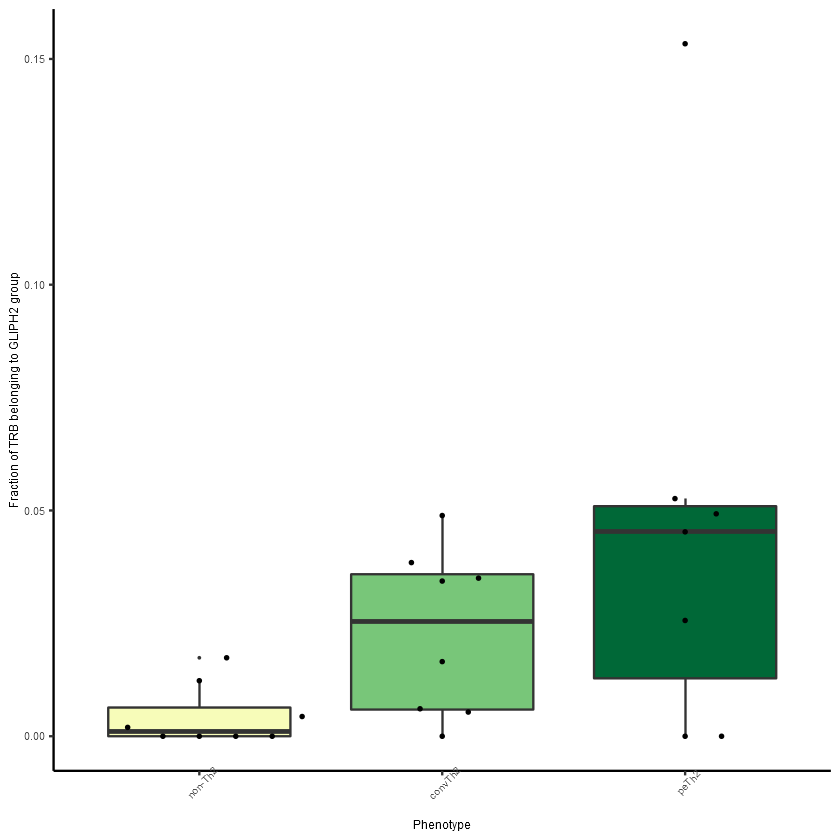

In [16]:
library(ggpubr)
data = read.table('eoe_pb_cluster.csv', sep = ',', header = 1)# %>% select(index, pattern, Fisher_score, TcRb, V, J, Sample)
data = data %>% filter(pattern != 'single')
data$patient = sapply(data$Sample, function(x) substring(x, 2, 4))
table(data$patient)
    
data$gliphid = paste0(data$index,'_', data$patient)
data$trbid = paste0(data$patient, data$TcRb)

tab = table(data$gliphid)
gliph_use = names(tab)[tab > 1]

matches = data %>% filter(gliphid %in% gliph_use)
seurat@meta.data$idb = paste0(seurat@meta.data$Patient, seurat@meta.data$TRB_CDR3)
seurat@meta.data$gliph_hit = as.numeric(seurat@meta.data$idb %in% matches$trbid)
    
df = seurat@meta.data %>% filter(!is.na(TRB_CDR3)) %>% group_by(Patient, pheno) %>% summarize(nhit = sum(gliph_hit), ntot = n()) %>% mutate(p = nhit/ntot) %>% filter(ntot > 10)
    ggplot(df, aes(x = pheno, y = p)) + geom_boxplot(aes(fill = pheno), outlier.size = 0) + geom_beeswarm(cex = 5, size = .5) + 
                                       scale_fill_manual(values = palette) + theme_classic() + labs(x = 'Phenotype', y = 'Fraction of TRB belonging to GLIPH2 group') + 
                                        guides(fill = FALSE) + theme(axis.text.x = element_text(size = 6, angle = 45), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6))
ggsave('gliph_pheno.pdf', height = 2.2, width = 1.5, useDingbats = FALSE)                                                                      


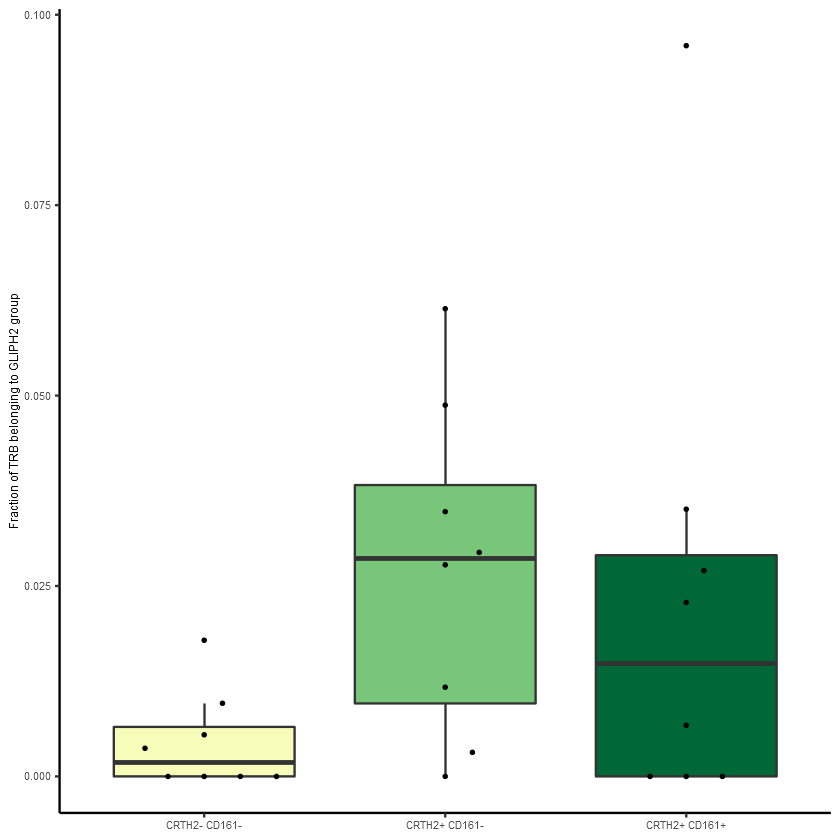

In [17]:
library(ggpubr)
set.seed(1)

df = seurat@meta.data %>% filter(!is.na(TRB_CDR3)) %>% group_by(Patient,Fraction) %>% summarize(nhit = sum(gliph_hit), ntot = n()) %>% mutate(p = nhit/ntot) %>% filter(ntot > 10)

    ggplot(df, aes(x =Fraction, y = p)) + geom_boxplot(aes(fill = Fraction), outlier.size = 0) + geom_beeswarm(cex = 5, size = .5) + 
                                       scale_fill_manual(values = palette) + theme_classic() + labs(x = c(), y = 'Fraction of TRB belonging to GLIPH2 group') + 
                                        guides(fill = FALSE) + theme(axis.text.x = element_text(size = 6, angle = 0), axis.title = element_text(size = 7), axis.text.y = element_text(size = 6))
ggsave('gliph_Fraction.pdf', height = 2.1, width = 1.5, useDingbats = FALSE)                           


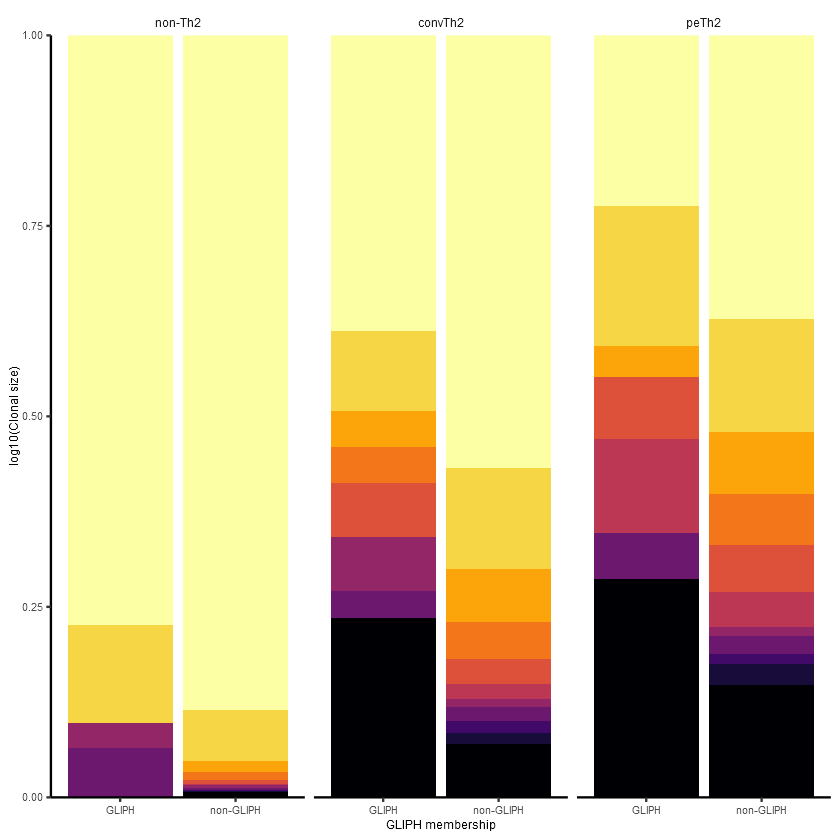

In [18]:
ggplot(seurat@meta.data %>% filter(!is.na(TRB_CDR3)), aes(x = factor(gliph_hit, levels = c(1,0)), fill = trb_size_factor)) + geom_bar(position = 'fill')+ facet_wrap('pheno') +  theme_classic()  + Axis_themes + labs(x = 'GLIPH membership', y = 'log10(Clonal size)') +
scale_x_discrete(labels = c('GLIPH', 'non-GLIPH')) + guides(fill = FALSE) + scale_fill_viridis_d(direction = -1, option = 'inferno') +  
theme(strip.background = element_blank(), strip.text.x = element_text(size = 7)) + scale_y_continuous(expand = c(0,0))
ggsave('gliph_expansion.pdf', height = 1.5, width = 2, useDingbats = FALSE)

In [19]:
tissue = readRDS('../../Data/tcrCDR3.RDS')@meta.data

tissue$idb = paste0(tissue$patient, tissue$TRB_CDR3)
tissue$ida = paste0(tissue$patient, tissue$TRA_CDR3)
#tissue$ida2 = paste0(tissue$patient, tissue$TRA.2_CDR3)
tissue$idb[is.na(tissue$TRB_CDR3)] = NA
tissue$ida[is.na(tissue$TRA_CDR3)] = NA
#tissue$idas[is.na(tissue$TRA.2_CDR3)] = NA

seurat@meta.data$idb = paste0(seurat@meta.data$Patient, seurat@meta.data$TRB_CDR3)
seurat@meta.data$ida = paste0(seurat@meta.data$Patient, seurat@meta.data$TRA_CDR3)
#seurat@meta.data$ida2 = paste0(seurat@meta.data$Patient, seurat@meta.data$TRA.2_CDR3)
seurat@meta.data$idb[is.na(seurat@meta.data$TRB_CDR3)] = NA
seurat@meta.data$ida[is.na(seurat@meta.data$TRA_CDR3)] = NA
#seurat@meta.data$ida2[is.na(seurat@meta.data$TRA.2_CDR3)] = NA


    0     1 
30610    25 

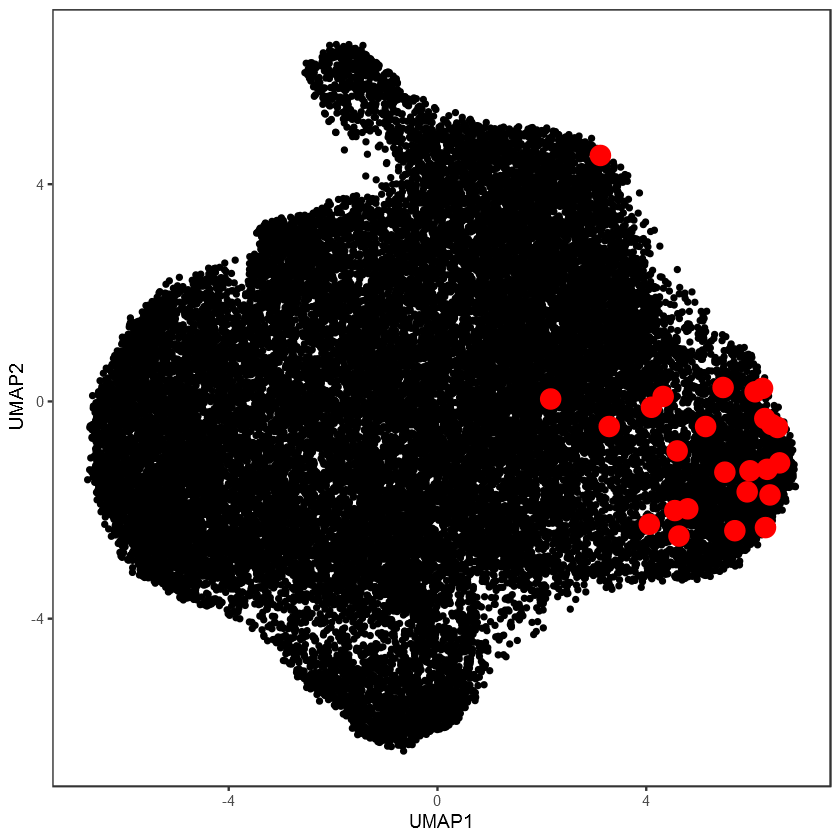

In [20]:
peth2_overlap = tissue$idb[tissue$pheno == 'peTh2' & tissue$idb %in% seurat@meta.data$idb]
peth2_overlapa = tissue$ida[tissue$pheno == 'peTh2' & tissue$ida %in% seurat@meta.data$ida]# | tissue$ida %in% seurat@meta.data$ida2]
#peth2_overlapa2 = tissue$ida2[tissue$pheno == 'peTh2' & tissue$ida2 %in% seurat@meta.data$ida2 & FALSE]# | tissue$ida2 %in% seurat@meta.data$ida]

peth2_overlap = c(peth2_overlap, peth2_overlapa)#, peth2_overlapa2)
peth2_overlap = peth2_overlap[!is.na(peth2_overlap)]
seurat@meta.data$flag = as.numeric(seurat@meta.data$idb %in% peth2_overlap | seurat@meta.data$ida %in% peth2_overlap)# | seurat@meta.data$ida2 %in% peth2_overlap)
DimPlot(seurat, 'umap', sizes.highlight = 5, cells.highlight = seurat@cell.names[seurat@meta.data$flag == 1])
table(seurat@meta.data$flag)

In [21]:
trb_match = seurat@meta.data$TRB_CDR3[seurat@meta.data$flag == 1]
tra_match = seurat@meta.data$TRA_CDR3[seurat@meta.data$flag == 1]
trb_match = trb_match[!is.na(trb_match)]
tra_match = tra_match[!is.na(tra_match)]

seurat@meta.data$flag2 = as.numeric(seurat@meta.data$TRB_CDR3 %in% trb_match | seurat@meta.data$TRA_CDR3 %in% tra_match)
table(seurat@meta.data$flag2)


    0     1 
30607    28 

In [22]:
seurat@meta.data$exp = seurat@data['GPR15', seurat@cell.names]
seurat@meta.data %>% filter(flag2 == 1) %>% select(Patient, TRB_CDR3, TRA_CDR3, flag2, exp)

Patient,TRB_CDR3,TRA_CDR3,flag2,exp
354,CASSPRLGRGGTDTQYF,CALTPGRSGGGADGLTF,1,0.0000000
354,CASSRLGFYNEQFF,NA,1,0.0000000
354,CALEGSDTQYF,CAASQETGANNLFF,1,0.0000000
354,CASSPPGGYSNQPQHF,NA,1,0.0000000
354,CASSQPDSGSKSSYNSPLHF,NA,1,0.0000000
354,NA,CAASQETGANNLFF,1,0.0000000
354,CASSQPDSGSKSSYNSPLHF,NA,1,0.0000000
354,CASSPRLGRGGTDTQYF,CALTPGRSGGGADGLTF,1,0.0000000
354,CASSDGPNTEAFF,NA,1,0.8394517
354,CASSQPDSGSKSSYNSPLHF,NA,1,0.0000000


In [23]:
# the two that come up as 451 are mismatched
seurat@meta.data$flag2[seurat@meta.data$Patient == 451] = 0

In [24]:
mode = function(x) {
    if (sum(is.na(x)) == length(x)) {
        x = NA
    }
    else {
        tab = table(x)
        tab = tab[order(tab, decreasing = TRUE)]
        x = as.character(names(tab)[1])
    }
    as.character(x)
}
processed =seurat@meta.data %>% filter(flag == 1) %>% select(pheno, Patient, TRB_CDR3, TRA_CDR3, TRA.2_CDR3, tag) %>% 
group_by(TRB_CDR3) %>% mutate(clone = paste0(TRB_CDR3, ' / ', mode(TRA_CDR3))) %>% arrange(TRB_CDR3)


processed = seurat@meta.data %>% filter(!is.na(TRB_CDR3) & TRB_CDR3 %in% processed$TRB_CDR3 |
                                        !is.na(TRA_CDR3) & TRA_CDR3 %in% processed$TRA_CDR3) %>%
                select(pheno, Patient, TRB_CDR3, TRA_CDR3, TRA.2_CDR3, tag) %>% 
group_by(TRB_CDR3) %>% mutate(clone = paste0(TRB_CDR3, ' / ', mode(TRA_CDR3))) %>% arrange(TRB_CDR3) %>% filter(Patient != 451)
processed$clone[processed$TRA_CDR3 == 'CAASQETGANNLFF'] = 'CALEGSDTQYF / CAASQETGANNLFF'
processed$clone[processed$TRA_CDR3 == 'CAASIGETSYDKVIF'] = 'CASSPRLGRGSTDTQYF / CAASIGETSYDKVIF'
processed$clone[processed$TRA_CDR3 == 'CALTPGRSGGGADGLTF'] = 'CASSPRLGRGGTDTQYF / CALTPGRSGGGADGLTF'

processed$clone[processed$TRA_CDR3 == 'CAASIGETSYDKVIF'] = 'CASSPRLGRGSTDTQYF / CAASIGETSYDKVIF'
processed$clone[processed$TRB_CDR3 == 'CASSPPGGYSNQPQHF'] = 'CASSPPGGYSNQPQHF / CAEKLRDTGRRALTF'
processed$clone[processed$TRB_CDR3 == 'CASSDGPNTEAFF'] = 'CASSDGPNTEAFF / CAASRGANDKLIF'
processed$clone[processed$TRA_CDR3 == 'CAGPNTGTASKLTF'] = 'CASSPVFGTEAFF / CAGPNTGTASKLTF'

processed


pheno,Patient,TRB_CDR3,TRA_CDR3,TRA.2_CDR3,tag,clone
peTh2,354,CALEGSDTQYF,CAASQETGANNLFF,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CALEGSDTQYF,CAASQETGANNLFF,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
convTh2,354,CALEGSDTQYF,CAASQETGANNLFF,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CALEGSDTQYF,NA,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CALEGSDTQYF,NA,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CALEGSDTQYF,CAASQETGANNLFF,NA,0.0000000,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CALEGSDTQYF,NA,NA,0.9814547,CALEGSDTQYF / CAASQETGANNLFF
peTh2,354,CASSDGPNTEAFF,NA,NA,0.8394517,CASSDGPNTEAFF / CAASRGANDKLIF
peTh2,474,CASSFDGETQYF,CAVTPSNSGYALNF,NA,1.7921763,CASSFDGETQYF / CAVTPSNSGYALNF
peTh2,474,CASSLVGSQDEQFF,CAVLRR*PVLF,NA,1.0800302,CASSLVGSQDEQFF / CAVLRR*PVLF


In [25]:
# fill in this alpha chain
tissue %>% filter(TRB_CDR3 == 'CASSDGPNTEAFF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

# multiple alpha, so leave blank 
tissue %>% filter(TRB_CDR3 == 'CASSLVGSQDEQFF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

# fill in this alpha chain
tissue %>% filter(TRB_CDR3 == 'CASSPPGGYSNQPQHF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

tissue %>% filter(TRB_CDR3 == 'CASSQPDSGSKSSYNSPLHF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

tissue %>% filter(TRB_CDR3 == 'CASSRLGFYNEQFF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

tissue %>% filter(TRA_CDR3 == 'CAGPNTGTASKLTF') %>% select(patient, pheno, TRB_CDR3, TRA_CDR3, TRA.2_CDR3)

patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
354,peTh2,CASSDGPNTEAFF,CAASRGANDKLIF,NA


patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
474,peTh2,CASSLVGSQDEQFF,NA,NA
474,peTh2,CASSLVGSQDEQFF,CAVRDSVERQNFVF,NA
474,peTh2,CASSLVGSQDEQFF,CALSNQAGTALIF,NA


patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
354,peTh2,CASSPPGGYSNQPQHF,CAEKLRDTGRRALTF,NA


patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
354,peTh2,CASSQPDSGSKSSYNSPLHF,NA,NA


patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
354,peTh2,CASSRLGFYNEQFF,NA,NA


patient,pheno,TRB_CDR3,TRA_CDR3,TRA.2_CDR3
474,peTh2,CASSPVFGTEAFF,CAGPNTGTASKLTF,CAVFSGGTSYGKLTF


In [26]:
seurat@meta.data$clone_or_peth2 = as.character(seurat@meta.data$pheno)
seurat@meta.data$clone_or_peth2[seurat@meta.data$flag2 == 1] = 'clone'
seurat = SetAllIdent(seurat, 'clone_or_peth2')
table(seurat@ident)
#markers_clones = FindMarkers(seurat, 'clone', 'peTh2', test.use = 'wilcox', logfc.threshold = 0)
#saveRDS(markers_clones, 'markers_clones.RDS')
markers_clones = readRDS('markers_clones.RDS')
head(markers_clones)



  clone convTh2 non-Th2   peTh2 
     26   10239   17203    3167 

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
GPR15,1.970622e-24,0.4613790,0.231,0.010,5.020947e-20
TRAV13-1,1.197980e-20,0.4787590,0.308,0.022,3.052333e-16
TRBV30,3.065226e-20,0.5446609,0.231,0.013,7.809890e-16
TMEM121,3.489907e-14,0.2493606,0.269,0.025,8.891934e-10
TRBV11-2,1.045606e-12,0.1827367,0.154,0.009,2.664099e-08
SLC4A10,4.945643e-12,0.1871132,0.154,0.010,1.260100e-07


Warning message:
"Removed 5 rows containing missing values (geom_point)."Warning message:
"Removed 7293 rows containing missing values (geom_text)."

Warning message:
"Removed 5 rows containing missing values (geom_point)."Warning message:
"Removed 7293 rows containing missing values (geom_text)."

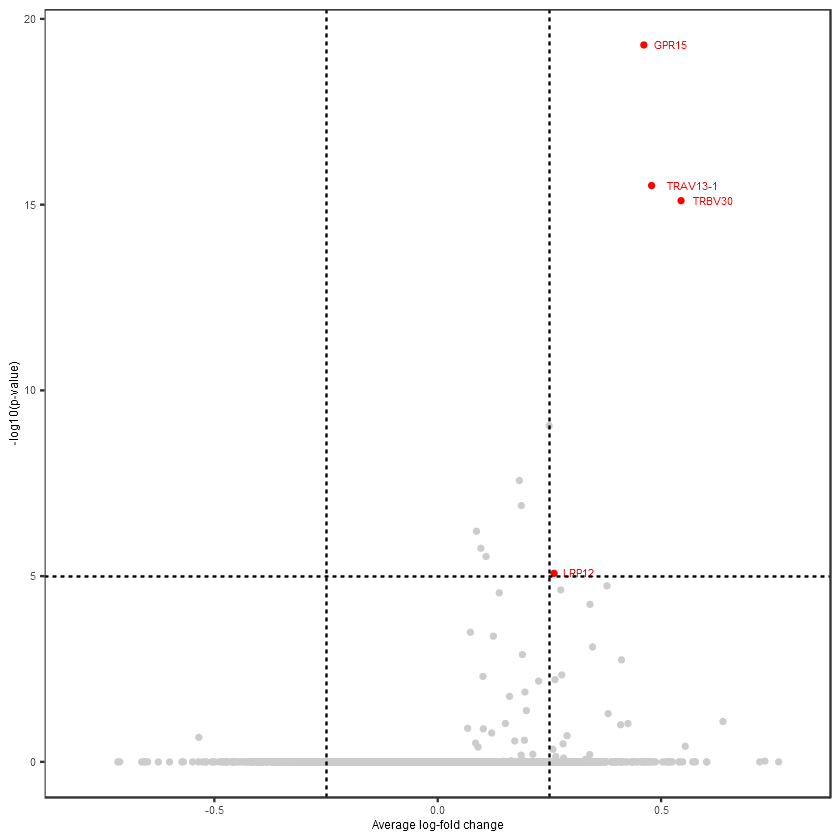

In [27]:
markers = markers_clones
genes = rownames(markers)[markers$p_val_adj < 1e-5 & markers$avg_logFC > .25]
#genes = genes[!is.na(genes)][1:3]
markers$label = NA 
markers[genes,'label'] = genes
markers$color = 'zgene'
markers$color[markers$p_val_adj < 1e-5] = 'other2'

markers$color[markers$p_val_adj < 1e-5& markers$avg_logFC > .25] = 'other'

dotcolors = c('red', 'grey80', 'grey80', 'green', 'purple', 'grey80')
markers$plot = markers$p_val_adj
markers$plot[markers$p_val_adj < 1e-80] = 1e-80
markers = markers[rev(order(markers$color)),]
ggplot(markers, aes(x = avg_logFC, y = -log10(plot), label = label, color = color)) + geom_point(size = 1) +remove_grid+ Axis_themes + geom_text(size = 2.11667, hjust = -.3) + 
guides(color = FALSE)+  labs(x = 'Average log-fold change', y = '-log10(p-value)') + guides(color = FALSE)  + scale_color_manual(values = dotcolors) + 
geom_hline(yintercept = 5, linetype = 'dashed') + scale_x_continuous(limits = c(-.8, .8)) + geom_vline(xintercept= .25, linetype = 'dashed') + geom_vline(xintercept = -.25, linetype = 'dashed')
ggsave('volcano.pdf', height = 2.3, width= 2.3, useDingbats = FALSE)

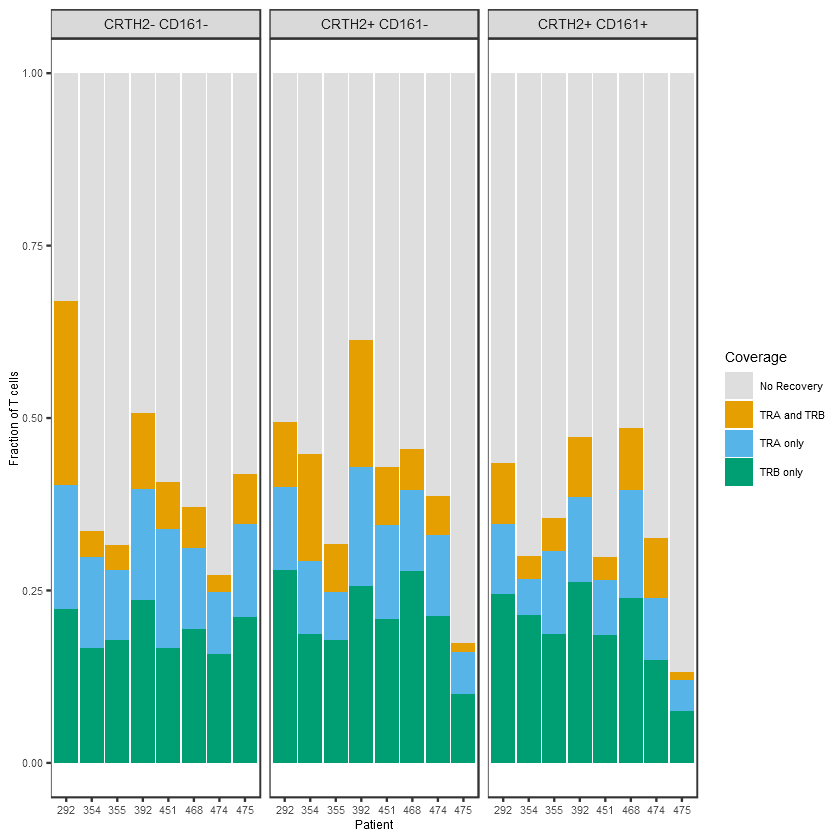

In [28]:
cbPalette <- c("gray87", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

ggplot(seurat@meta.data, aes(x = factor(Patient), fill = TCR_Recovery)) + geom_bar(position = 'fill') +
scale_fill_manual("Coverage", values = c("TRA only" = cbPalette[3], "TRB only" = cbPalette[4], "TRA and TRB" = cbPalette[2], 'No Recovery' = cbPalette[1])) + remove_grid + Axis_themes +
labs(x = 'Patient', y = 'Fraction of T cells') + theme(axis.title = element_text(size = 7)) + facet_wrap('Fraction')
ggsave('TCRrecovery.pdf', height = 3, width = 6, useDingbats = FALSE)

In [29]:
# pick three most expanded clonotypes frome ach patient
n = 7
df = seurat@meta.data %>% group_by(Patient, idb) %>% summarize(trb_count = TRB_count[1]) %>%top_n(n) %>% group_by(Patient) %>% sample_n(n) %>% filter(trb_count > 3)
clones.use = df$idb
df = seurat@meta.data %>% filter(idb %in% clones.use) 
tab = table(df$idb, df$pheno)
cdr3s = sapply(rownames(tab), function(x) substring(x, 4, 100))
patients = sapply(rownames(tab), function(x) substring(x, 1, 3))
diagnoses = ifelse(patients %in% c(355, 392, 468), 'Remission', 'Active disease')

patient_palette = brewer.pal(8, 'Set2')
names(patient_palette) = c(354, 474, 292, 355, 392, 451, 468, 475)
diag_palette =brewer.pal(6, 'Paired')[6:5]
names(diag_palette) = c('Active disease', 'Remission')
counts = rowSums(tab)
cdr3s = paste0(cdr3s, ' (', counts, ')')
    
meta.data = data.frame(row.names = cdr3s, Patient = patients, Diagnosis = diagnoses)
rownames(tab) = cdr3s

pheatmap(tab/rowSums(tab), annotation_row = meta.data, annotation_colors = list(Patient = patient_palette, Diagnosis = diag_palette), fontsize = 6, width = 3.3, height = 4, filename = 'cloneheat2.pdf', 
        treeheight_row = 12, treeheight_col = 5, color = inferno(100), cluster_cols = FALSE)

Selecting by trb_count


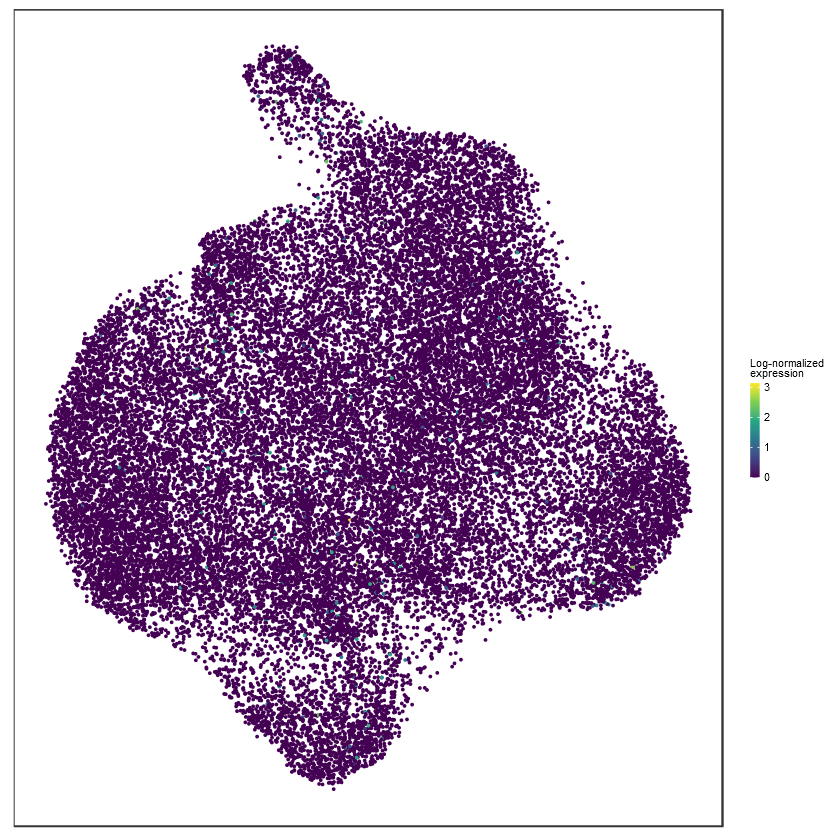

In [30]:
geneplot = function (seurat, genes) 
{
    plots = c()
    for (curr in genes) {
          seurat@meta.data$gene = seurat@data[curr, rownames(seurat@meta.data)]
        plots[[curr]] = ggplot(shuffle(seurat@meta.data), aes(x = UMAP1, 
            y = UMAP2, color = gene)) + geom_point(size = 0.01) + 
            scale_color_viridis_c()  + 
            theme(axis.title = element_blank(), axis.text = element_blank()) + 
            remove_grid + labs(x = c(),  y =c(), color = 'Log-normalized\nexpression') + theme(axis.text.x = element_blank(), 
                                                        axis.text.y = element_blank(), 
                                                        axis.ticks = element_blank(), 
                                                        legend.text = element_text(size = 6), 
                                                        legend.title = element_text(size = 6), 
                                                        legend.key.height= unit(.4, 'cm'),
                                                        legend.key.width= unit(.2, 'cm'))
    }
    gg = plot_grid(plotlist = plots)
    gg
}
geneplot(seurat, 'GPR15') + ggtitle('GPR15')
ggsave('gpr15_umap.pdf', height = 2, width = 2.7, useDingbats = FALSE)

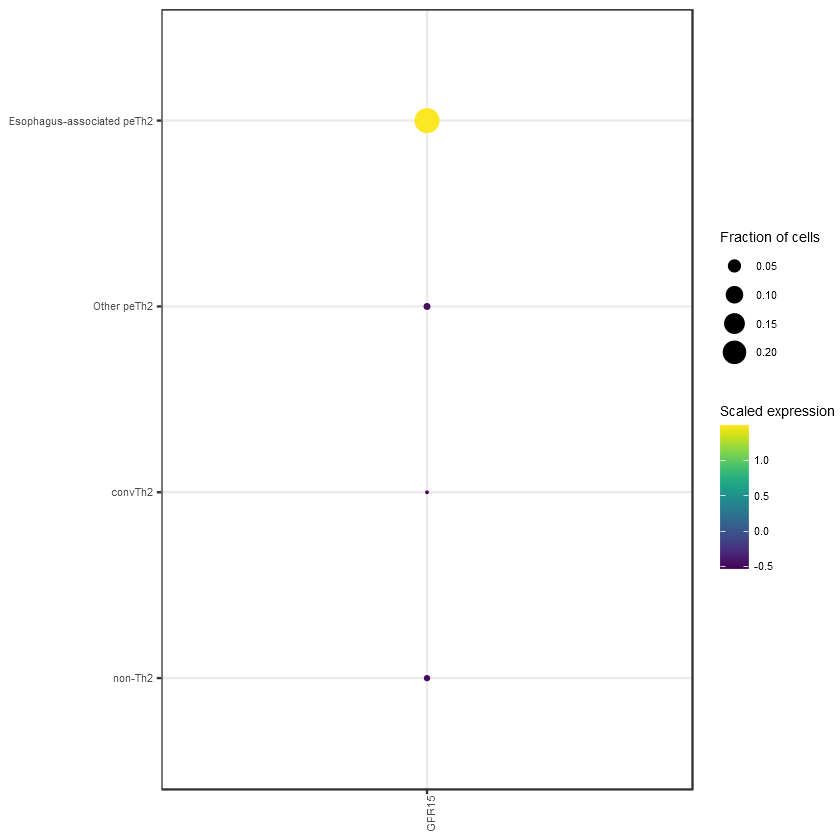

In [31]:
genes = c( "GPR15")

pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = data.frame(GPR15 = as.matrix(seurat@data[genes,]))
data$phenotype = as.character(seurat@meta.data$pheno)
data$phenotype[seurat@meta.data$pheno == 'peTh2'] = 'Other peTh2'
data$phenotype[seurat@meta.data$flag2 == 1] = 'Esophagus-associated peTh2'
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame()
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] = 1.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled expression", size = 'Fraction of cells')  + scale_y_discrete(limits = rev(c('Esophagus-associated peTh2', 'Other peTh2', 'convTh2', 'non-Th2'))) + Axis_themes + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 6), axis.text.y = element_text(size = 6))  + scale_size_continuous(range = c(.01, 6))
ggsave('gpr15_dot.pdf', width =4, height =3, useDingbats = FALSE)